# Introduction

Star Wars Survey

## Overview of the Data

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv("starwars.csv", encoding="ISO-8859-1")

star_wars = star_wars.iloc[1:]

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degre

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

***

## Data Cleaning


### Changing Values

Attention will first be given to the following columns:

* Have you seen any of the 6 films in the Star Wars franchise?

* Do you consider yourself to be a fan of the Star Wars film franchise?

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [4]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)







In [5]:
key = {
    "Yes": True,
    "No": False
}


star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(key)

### Which films have been seen?

In [6]:
import numpy as np

seen = { "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}
 


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen)

    
star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 
    'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 
    'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6' })


In [7]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Ranking of films

In [8]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
star_wars.iloc[:,9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


***

# Main Analysis

## Rankings Summary

We have cleaned up many of the columns in this dataset, specifically the ranking columns. These have been converted to "ranking_1, ranking_2, etc." The column "ranking_1' corresponds to the first film in the series with each column afterwards following the same naming convention.

The mean of each ranking column was calculated and then plotted on a bar chart to determine which film had the highest ranking. A ranking of 1 means the film was the survey respondents most favorite film and a ranking of 6 means the film was their least favorite.

The bar chart demonstrates that the 5th film, Star Wars Episode V: The Empire Strikes Back, was the highest ranked film (most favorite film among survey respondents). 



In [11]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

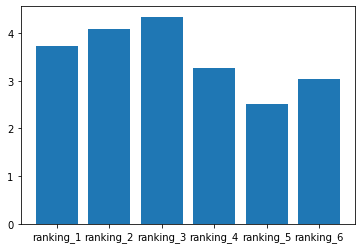

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean())

## Seen Summary

The rankings data appears to correspond positively to the seen data. This would make sense on a practical level. As viewers see the movie, they rank it afterwards and develop their thoughts on how they liked it. This then can determine how many more times they watch the movie as well as others who watch it. For example, if an individual viewer thinks highly of one of the movies, he will tell his or her friends and they may consequently watch the movie for themselves, thus increasing the amount of times a certain film in the series has been seen. In light of this, it could be safely concluded that the seen columns are dependent variables upon the rankings columns.

In [13]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

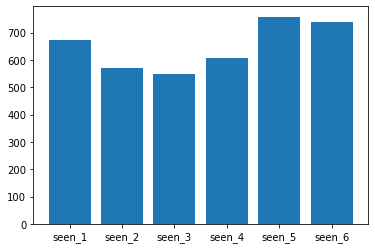

In [14]:
plt.bar(star_wars.columns[3:9], star_wars[star_wars.columns[3:9]].sum())

## Male and Female Groups Summary

The male and female survey respondents were split into 2 separate groups to see how they compared in their respective rankings of the film series franchise.
The trends of rankings between male and female viewers are almost identical. Both groups also ranked Star Wars Episode V: The Empire Strikes Back, with the highest rank. A similar pattern also emerges for seen columns. The fifth film in the franchise was seen the most by both the male and female groups. See the analysis below.

In [15]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [16]:
males[males.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [17]:
females[females.columns[9:15]].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

<BarContainer object of 6 artists>

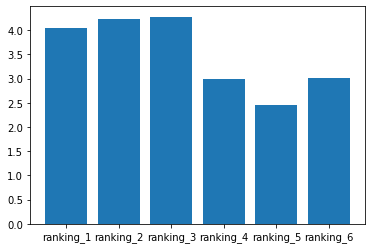

In [18]:
plt.bar(males.columns[9:15], males[males.columns[9:15]].mean())

<BarContainer object of 6 artists>

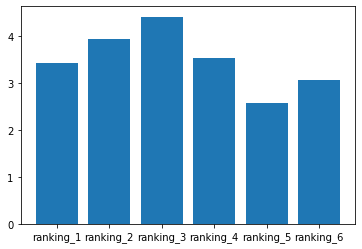

In [19]:
plt.bar(females.columns[9:15], females[females.columns[9:15]].mean())

<BarContainer object of 6 artists>

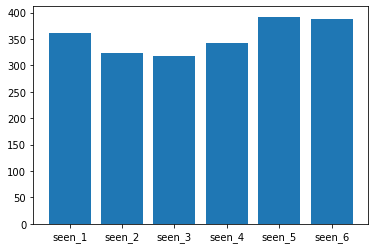

In [20]:
plt.bar(males.columns[3:9], males[males.columns[3:9]].sum())

<BarContainer object of 6 artists>

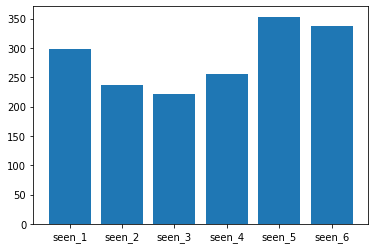

In [21]:
plt.bar(females.columns[3:9], females[females.columns[3:9]].sum())

## Star Wars Fans vs. Non Star Wars Fans

The trends appear to be nearly the same between Star Wars Fans and Non Star Wars Fans. Both groups agree that the fifth film in the franchise (Star Wars Episode V: The Empire Strikes Back) is their most favorite film in the series. Although, it's worth mentioning that Episode V only beat out Episode I by a small margin among Non Star Wars fans. As far as the most viewed films in the series, Episode V was also the most viewed among both groups. However, among the Star Wars Fan group, it only beat out Episode VI by one point.

In [22]:
star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

<BarContainer object of 6 artists>

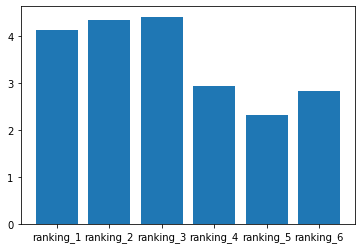

In [23]:
plt.bar(star_wars_fan.columns[9:15], star_wars_fan[star_wars_fan.columns[9:15]].mean())

<BarContainer object of 6 artists>

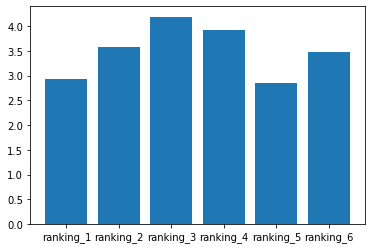

In [24]:
plt.bar(non_star_wars_fan.columns[9:15], non_star_wars_fan[non_star_wars_fan.columns[9:15]].mean())

In [25]:
non_star_wars_fan[non_star_wars_fan.columns[9:15]].mean()

ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64

<BarContainer object of 6 artists>

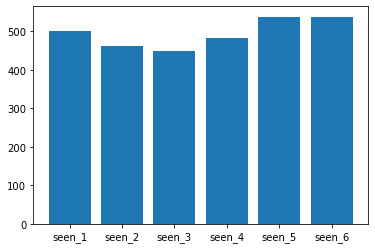

In [26]:
plt.bar(star_wars_fan.columns[3:9], star_wars_fan[star_wars_fan.columns[3:9]].sum())

In [27]:
star_wars_fan[star_wars_fan.columns[3:9]].sum()

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64

<BarContainer object of 6 artists>

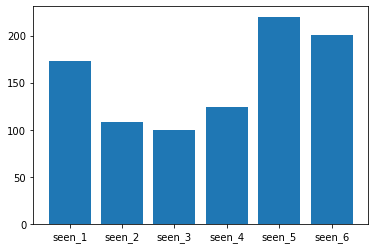

In [28]:
plt.bar(non_star_wars_fan.columns[3:9], non_star_wars_fan[non_star_wars_fan.columns[3:9]].sum())

In [29]:
non_star_wars_fan[non_star_wars_fan.columns[3:9]].sum()

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64

***

# Conclusion

Overall, all of the above patterns can also be found among the Male and Female groups, as well as the survey respondents taken as a whole. The consensus is that Star Wars Episode V: The Empire Strikes Back is the best and most watched film in the series.